In [9]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook

In [10]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [11]:
#データにアクセス
data = hdu.data
## numpy.ndarray objectでデータを返す

#headerにアクセス
header = hdu.header
## astropy.io.fits.header.Headerでheaderを返す

In [12]:
cube = sc.read(hdu)

In [13]:
cube

SpectralCube with shape=(101, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:    101  type_s: VELO      unit_s: m / s  range:   -70000.000 m / s:  -20000.000 m / s

In [14]:
#速度範囲の切り出し
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [15]:
subcube

SpectralCube with shape=(31, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:     31  type_s: VELO      unit_s: km / s  range:      -55.000 km / s:     -40.000 km / s

In [39]:
#masking
include_mask = subcube > 1.3*u.K
subcube_masked = subcube.with_mask(include_mask)

In [43]:
mom0 = subcube.moment(order=0)
mom1 = subcube_masked.moment(order=1)
mom2 = subcube.moment(order=2)

/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


In [44]:
# hduにする
hdu_mom = mom1.hdu

INFO: Auto-setting vmin to -5.093e+01 [aplpy.core]
INFO: Auto-setting vmax to -3.891e+01 [aplpy.core]


/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


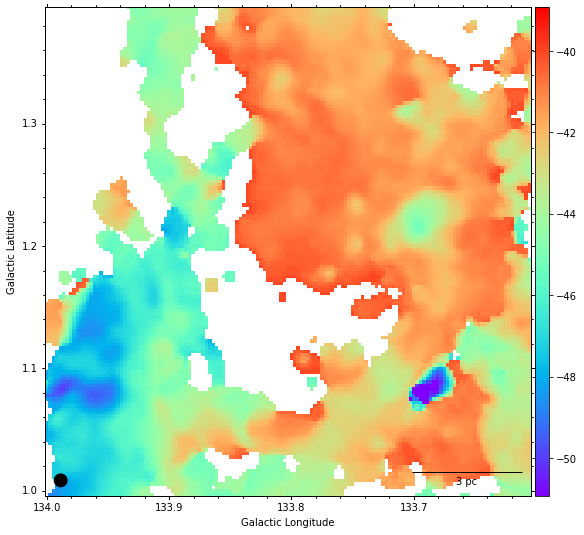

In [46]:
f = aplpy.FITSFigure(hdu_mom)
#f.show_colorscale(vmax=400, vmin=0, cmap='inferno_r')
f.show_colorscale(cmap='rainbow')
# 軸の表記を変換
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
f.show_contour(levels=np.linspace(0,800,21)+20, colors='black', linewidths=0.5)

#スケールバー
f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')

In [33]:
np.linspace(0,20,21)*40+10

array([ 10.,  50.,  90., 130., 170., 210., 250., 290., 330., 370., 410.,
       450., 490., 530., 570., 610., 650., 690., 730., 770., 810.])

In [34]:
savefig_in_notebook(f, 'test.pdf')

INFO: Auto-setting resolution to 21.1921 dpi [aplpy.core]
